**IRIS KNN Model**

In [ ]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import datasets, decomposition
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
#read dataset
df = pd.read_csv('/content/Iris.csv')


# return the fist 5 rows
df.head(60)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
#check the shape of the dataset
df.shape

(150, 6)

# **Vizualization of IRIS**

In [ ]:
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])

# Separate features and target variable
X = df.drop(columns=['Species'])
y = df['Species']

# Apply PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)




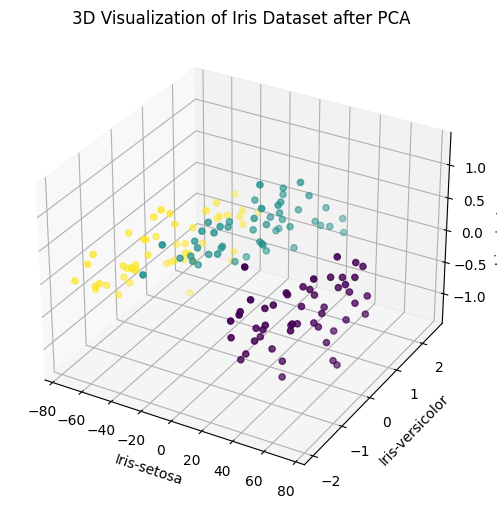

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis')

# Set labels and title
ax.set_xlabel('Iris-setosa')
ax.set_ylabel('Iris-versicolor')
ax.set_zlabel('Iris-virginica')
ax.set_title('3D Visualization of Iris Dataset after PCA')

# Show the plot
plt.show()

## **Training Section**

In [ ]:
#divide the data into parts to train and other parts to test

train=df.sample(frac=0.8,random_state=200)
test=df.drop(train.index)
train


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
84,85,5.4,3.0,4.5,1.5,1
122,123,7.7,2.8,6.7,2.0,2
28,29,5.2,3.4,1.4,0.2,0
24,25,4.8,3.4,1.9,0.2,0
75,76,6.6,3.0,4.4,1.4,1
...,...,...,...,...,...,...
117,118,7.7,3.8,6.7,2.2,2
59,60,5.2,2.7,3.9,1.4,1
45,46,4.8,3.0,1.4,0.3,0
32,33,5.2,4.1,1.5,0.1,0


# **Without PCA**

In [ ]:
#Drop Species columnfrom the traun part part
X_train = train.drop(columns=['Species'])
y_train = train['Species']
X_test = test.drop(columns=['Species'])
y_test = test['Species']

In [ ]:
knn_Model = KNeighborsClassifier(n_neighbors=3)
knn_Model.fit(X_train, y_train)

y_pred = knn_Model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
knn_Model = KNeighborsClassifier(n_neighbors=10)
knn_Model.fit(X_train, y_train)

y_pred = knn_Model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
knn_Model = KNeighborsClassifier(n_neighbors=40)
knn_Model.fit(X_train, y_train)

y_pred = knn_Model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


In [ ]:
knn_Model = KNeighborsClassifier(n_neighbors=70)
knn_Model.fit(X_train, y_train)

y_pred = knn_Model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


In [ ]:
knn_Model = KNeighborsClassifier(n_neighbors=80)
knn_Model.fit(X_train, y_train)

y_pred = knn_Model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5666666666666667


# **USING PCA**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Convert the 'Species' column to numeric format
train['Species'] = label_encoder.fit_transform(train['Species'])
test['Species'] = label_encoder.fit_transform(test['Species'])

In [ ]:

from sklearn.decomposition import PCA

# Instantiate PCA with 3 components
pca = PCA(n_components=3)

# Fit PCA to the training data
pca.fit(train)

# Transform the training data using the trained PCA model
X_train_pca = pca.transform(train)

pca.fit(test)

# Transform the training data using the trained PCA model
X_train_pca = pca.transform(test)

# Now X_train_pca contains the transformed data with reduced dimensionality


In [ ]:
X_train_PCA = train.drop(columns=['Species'])
y_train_PCA = train['Species']
X_test_PCA = test.drop(columns=['Species'])
y_test_PCA = test['Species']

In [ ]:
knn_Model = KNeighborsClassifier(n_neighbors=80)
knn_Model.fit(X_train_PCA, y_train_PCA)

y_pred = knn_Model.predict(X_test_PCA)


accuracy = accuracy_score(y_test_PCA, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5666666666666667


**Normalization**

In [ ]:
X = df.drop(columns=['Species'])

scaler = MinMaxScaler()

X_normalized = scaler.fit_transform(X)

df_normalized = pd.DataFrame(X_normalized, columns=X.columns)

df_normalized['Species'] = df['Species']

In [ ]:

train_Normalized=df.sample(frac=0.8,random_state=200)
test_Normalized=df.drop(train_Normalized.index)


In [ ]:
X_train_Normalized = train_Normalized.drop(columns=['Species'])
y_train_Normalized= train_Normalized['Species']
X_test_Normalized= test_Normalized.drop(columns=['Species'])
y_test_Normalized = test_Normalized['Species']

In [ ]:
knn_Model = KNeighborsClassifier(n_neighbors=80)
knn_Model.fit(X_train_Normalized, y_train_Normalized)

y_pred = knn_Model.predict(X_test_Normalized)


accuracy = accuracy_score(y_test_Normalized, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5666666666666667


**Other Technique to Normalization**

In [ ]:
X = df.drop(columns=['Species'])


mean_values = X.mean()

std_values = X.std()

normalized_df = (X - mean_values) / std_values

normalized_df['Species'] = df['Species']
normalized_df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-1.714797,-0.897674,1.028611,-1.336794,-1.308593,0
1,-1.691780,-1.139200,-0.124540,-1.336794,-1.308593,0
2,-1.668762,-1.380727,0.336720,-1.393470,-1.308593,0
3,-1.645745,-1.501490,0.106090,-1.280118,-1.308593,0
4,-1.622728,-1.018437,1.259242,-1.336794,-1.308593,0
...,...,...,...,...,...,...
145,1.622728,1.034539,-0.124540,0.816888,1.443121,2
146,1.645745,0.551486,-1.277692,0.703536,0.918985,2
147,1.668762,0.793012,-0.124540,0.816888,1.050019,2
148,1.691780,0.430722,0.797981,0.930239,1.443121,2


In [ ]:
train_Normal=df.sample(frac=0.8,random_state=200)
test_Normal=df.drop(train.index)



In [ ]:
X_train_Normal = train_Normal.drop(columns=['Species'])
y_train_Normal = train_Normal['Species']
X_test_Normal = test_Normal.drop(columns=['Species'])
y_test_Normal = test_Normal['Species']

In [ ]:
knn_Model = KNeighborsClassifier(n_neighbors=70)
knn_Model.fit(X_train_Normal, y_train_Normal)

y_pred = knn_Model.predict(X_test_Normal)


accuracy = accuracy_score(y_test_Normal, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


Conclusion the Model acurracy is the same using PCA or without and using Normalization or without

# **Step by Step KNN**

In [ ]:
df1 = pd.read_csv('/content/Iris.csv')


# return the fist 5 rows
df1.head(5)



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#divide the data into parts to train and other parts to test

train = df1.sample(frac=0.8, random_state=42)
test = df1.drop(train.index)
# test = df.sample(frac=0.01, random_state=200)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)



In [ ]:
def most_duplicated_number(lst):
    frequency = {}
    for num in lst:
        if num in frequency:
            frequency[num] += 1
        else:
            frequency[num] = 1

    max_count = 0
    most_common_num = None
    for num, count in frequency.items():
        if count > max_count:
            most_common_num = num
            max_count = count

    return most_common_num

In [ ]:
def KNN_Classifier(K):
  all_test_distances = []
  all_test_species = []
  for i in range(len(test)):
      distances = []
      corresponding_species = []  # Renamed variable for better readability
      for j in range(len(train)):
          distance = ((test["SepalLengthCm"][i] - train["SepalLengthCm"][j])**2 +
                      (test["SepalWidthCm"][i] - train["SepalWidthCm"][j])**2 +
                      (test["PetalLengthCm"][i] - train["PetalLengthCm"][j])**2 +
                      (test["PetalWidthCm"][i] - train["PetalWidthCm"][j])**2)**0.5  # Euclidean distance formula
          # print(f"Distance is {distance}")
          distances.append(distance)
          corresponding_species.append(train["Species"][j])  # Store the corresponding species
          # print(f'Species is {train["Species"][j]}')
      all_test_distances.append(distances)
      all_test_species.append(corresponding_species)
  for i in range(len(all_test_distances)):
    for j in range(len(all_test_distances[i])):
        for k in range(j+1, len(all_test_distances[i])):
            if all_test_distances[i][j] > all_test_distances[i][k]:

                temp = all_test_distances[i][j]
                all_test_distances[i][j] = all_test_distances[i][k]
                all_test_distances[i][k] = temp

                temp2 = all_test_species[i][j]
                all_test_species[i][j] = all_test_species[i][k]
                all_test_species[i][k] = temp2
  Results = []

  for i in range(len(all_test_species)):
    Results.append(most_duplicated_number(all_test_species[i][0:K]))
  Count = 0
  for i in range(len(test)):
    if test['Species'][i] == Results[i]:
      Count += 1

  return (Count/30)*100






In [ ]:
Ks = [3, 5, 7]
for i in range(len(Ks)):

 print(f'Accuracy is {KNN_Classifier(Ks[i])} for K equal {Ks[i]}' )

Accuracy is 96.66666666666667 for K equal 3
Accuracy is 96.66666666666667 for K equal 5
Accuracy is 96.66666666666667 for K equal 7


## Normalization

In [ ]:
for i in range( 1, 5):
    mean = np.mean(df1.iloc[:, i])
    std = np.std(df1.iloc[:, i])

    for j in range(len(df1)):
        # Normalize
        df1.iloc[:, i][j] = (df1.iloc[:, i][j] - mean) / std

# Normalized df
df1

<ipython-input-30-93b4b595c8f8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.iloc[:, i][j] = (df1.iloc[:, i][j] - mean) / std


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,2,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,3,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,4,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,5,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa
...,...,...,...,...,...,...
145,146,1.038005,-0.124958,0.819624,1.447956,Iris-virginica
146,147,0.553333,-1.281972,0.705893,0.922064,Iris-virginica
147,148,0.795669,-0.124958,0.819624,1.053537,Iris-virginica
148,149,0.432165,0.800654,0.933356,1.447956,Iris-virginica


In [ ]:
Ks = [3, 5, 7]
for i in range(len(Ks)):

 print(f'Accuracy is {KNN_Classifier(Ks[i])} for K equal {Ks[i]}' )

Accuracy is 96.66666666666667 for K equal 3
Accuracy is 96.66666666666667 for K equal 5
Accuracy is 96.66666666666667 for K equal 7
